<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/ejer2_0_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística con gradiente descendente

 La regresión logística es un algoritmo de clasificación de aprendizaje supervisado, lo que significa que puede estimar la clase de nuevas observaciones en función de observaciones etiquetadas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
%matplotlib inline

## Conjunto de datos

supongamos 10 observaciones y dos características y dos clases (clasificación binaria).

In [3]:
X, y = make_classification(
        n_samples=10,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1)
print(X)
print(y)

[[-0.64185521  0.78535215]
 [ 0.10972634  1.83671408]
 [-1.07362634  2.591487  ]
 [-1.38222372  0.85340843]
 [ 1.78689446  2.3841826 ]
 [ 0.94785273  3.53015683]
 [ 1.08876018  1.35925144]
 [ 0.42774158  3.54015499]
 [-0.88398194 -0.57876171]
 [-1.59347411  1.2168913 ]]
[1 0 1 1 0 0 0 0 1 1]


Text(0, 0.5, '$X_2$')

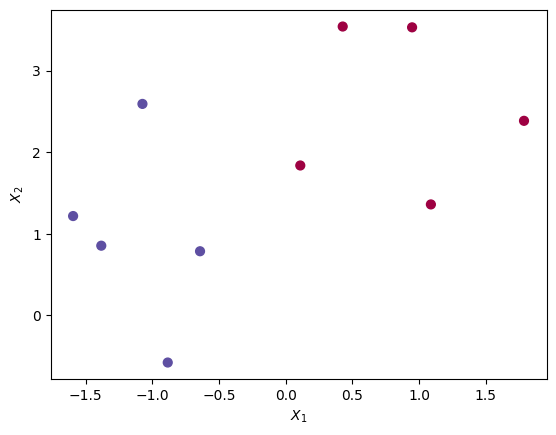

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
# blue dots = 1, red dots = 0

Tenemos 10 observaciones $X$ con dos características, el vector $\theta$ tendrá tres elementos contando el intercept y conocemos también el vector objetivo (etiqueta) $y$. Podemos predecir el valor (prob) de una nueva observación??

## Regresión Logística

Intentamos modelar la probabilidad de que una observación pertenezca a una categoría particular.
Para generar estas probabilidades, la regresión logística utiliza la función **sigmoide**. Esta función asigna un número real a valores entre 0 y 1.
\begin{equation}
g(z) = \frac{1}{1+e^{-z}}
\end{equation}

Podemos definir nuestra   hipótesis como sigue, $h(X) = g(X \theta)$
donde:
- $\theta$ es el vector de coeficientes
- $X$ es el vector de todas las observaciones al cual le añadimos una columna de 1 para calcular el primer valor del vector $\theta$.

$h(X)$  nos da la probabilidad de que nuestra salida sea 1, lo que significa:
- Si $ X \theta \geqslant 0 $, entonces $h(X) \geqslant 0.5$, entonces la predicción es $y = 1$
- Si $ X \theta < 0 $, entonces $h(X) < 0.5$, entonces la predicción es $y = 0$

Ponemos nuestra columna de 1 al inicio de las caractrerísticas


In [9]:

def add_ones(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [10]:
#función sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
#xálculo de la hypòtesis
def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [21]:
XX = add_ones(X)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

In [22]:
print(XX)
print(theta)
print(h)

[[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
[0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


# Función de pérdida

Como se vió en clase para la regresión logística se define como,
\begin{equation}
J(\theta) = \frac{1}{m}(-y \log(h) - (1 - y) \log(1 - h))
\end{equation}
siendo $m$ es el número de observaciones.

Esta función penañiza las observaciones mal clasificadas, por ejemplo:  
- si $y=0$ y $h\rightarrow 1$, entonces $J(\theta)\rightarrow ∞$  (penalización fuerte)
- si $y=0$ y $h\rightarrow 0$, entonces $J(\theta)\rightarrow 0$  (penalización débil)
- si $y=1$ y $h\rightarrow 0$, entonces $J(\theta)\rightarrow ∞$  (penalización fuerte)
- si $y=1$ y $h\rightarrow 1$, entonces $J(\theta)\rightarrow 0$  (penalización débil)

In [23]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.6931471805599453


## Gradiente descendente

Para poder hacer una predicción adecuada, necesitamos minimizar la función de pérdida $J(\theta)$ y encontrar los valores del vector de coeficientes  $\theta$ que hacen mínima esta función. Para ello tenemos que calcular las derivadas de la función de pérdida respecto de cada coeficiente  $\theta$. Este "gradiente" cómo varía la función de pérdida al cambiar los coeficientes. Este procedimiento se denomina  *Gradiente Descendente*.
\begin{equation}
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
Siendo $\alpha$ es la tasa de aprendizaje.

Se puede demostrar que
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} X^T (h - y)
\end{equation}

In [24]:
m = y.size
alpha = 0.01

gradient = np.dot(XX.T, (h - y)) / m
theta = theta - alpha * gradient


In [25]:
print(gradient)

[0.         0.49680683 0.38910414]


In [26]:
print(theta)

[ 0.         -0.00496807 -0.00389104]


## Entrenamiento del modelo

a fin de encontrar los coeficientes del modelo, es decir los elementos del vector $\theta$, debemos proceder a realizar el gradiente descendente de forma iterativa

In [28]:
import  math
num_iter = 300000
epsilon = 10e-9
J_vals = []
prev = math.inf
for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    J_vals.append(cost)
    if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
    prev = J_vals[i]
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient
    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Adjusted coefficient: {}'.format(theta))

Cost: 0.057021197492913
Cost: 0.022670034594313958
Cost: 0.014586799781943643
Cost: 0.010800580833121942
Cost: 0.008585805998247872
Cost: 0.007128292118614267
Cost: 0.0060951770262227655
Cost: 0.00532422022992774
Cost: 0.004726688964519781
Cost: 0.004249897289681944
Cost: 0.00386056508162295
Cost: 0.0035366268508171574
Cost: 0.0032628705193235375
Cost: 0.0030284662273604673
Cost: 0.002825493250257099
Cost: 0.0026480240659474043
Cost: 0.002491534166299732
Cost: 0.0023525099516066867
Cost: 0.0022281812201854325
Cost: 0.002116334368080663
Convergencia Alcanzada ! 196116  iteraciones
Adjusted coefficient: [ 0.6671577  -9.83351445 -2.26794714]


## Variación de la función de pérdida

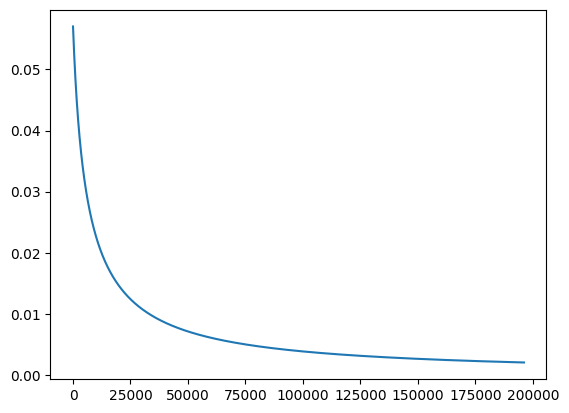

In [30]:
plt.plot(range(len(J_vals)), J_vals)

Como esperábamos la función de pçerdoda decrece.

## Realizando predicciones

Calculemos las predicciones, es decir la probabilidad para cada observación.

In [31]:
preds_prob = calc_h(XX, theta)
print(preds_prob)

[9.94501209e-01 1.01768745e-02 9.95261677e-01 9.99995555e-01
 2.04287070e-10 5.81770463e-08 2.00093961e-06 9.46472211e-06
 9.99976825e-01 9.99998730e-01]


El límite de decisión para la sigmoide es 0.5 con lo que podemos redondear las probabilidades para asignar la clase de cada observación.

In [32]:
preds = preds_prob.round()
print(preds)

[1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


Calculemos la medida de la precisión para estos datos de entreamiento.

In [33]:
score_numpy = (preds == y).mean()
print('Score Numpy: {}'.format(score_numpy))

Score Numpy: 1.0


No es muy informativo ya que hemos entrebado y probado con los mismos datos y los mismos valores objetivos $y$. Veams que sucede con una nueva onservación.

In [35]:
new_x = np.array([1, -0.8, 0.8])   # nuevo dato (-0.8, 0.8)  le adicionamos 1
print(new_x)
preds_prob_new_x = calc_h(new_x, theta).round()
print("predicción para la salida de la nueva observación: ", preds_prob_new_x)

[ 1.  -0.8  0.8]
predicción para la salida de la nueva observación:  1.0


## Recta de decisión

In [38]:
theta

array([ 0.6671577 , -9.83351445, -2.26794714])

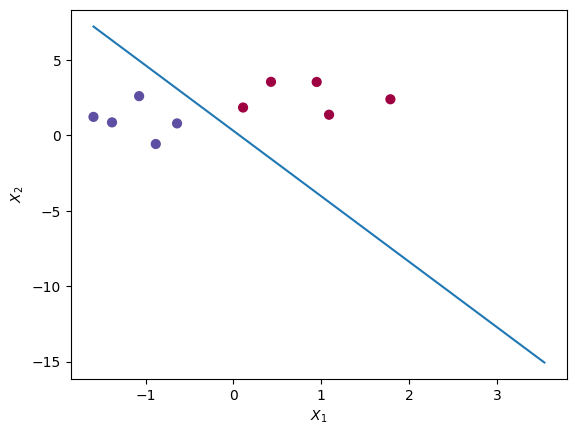

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

x_values = [np.min(X[:, 0] ), np.max(X[:, 1] )]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')


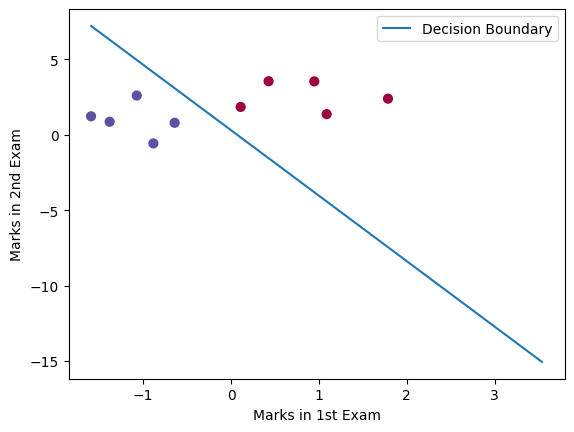

In [48]:
x_values = [np.min(X[:, 0] ), np.max(X[:, 1] )]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

## Sklearn implementation

Of course, logistic regression is already implemented in Scikit-learn.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
X

array([[-0.64185521,  0.78535215],
       [ 0.10972634,  1.83671408],
       [-1.07362634,  2.591487  ],
       [-1.38222372,  0.85340843],
       [ 1.78689446,  2.3841826 ],
       [ 0.94785273,  3.53015683],
       [ 1.08876018,  1.35925144],
       [ 0.42774158,  3.54015499],
       [-0.88398194, -0.57876171],
       [-1.59347411,  1.2168913 ]])

In [ ]:
model = LogisticRegression(penalty=None,max_iter=30000)
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)
print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(X)))

Score Sklearn: 1.0
[0.27561212] [[-14.70501451  -3.00497196]]
Confusion matrix : [[5 0]
 [0 5]]


In [ ]:
new_x = np.array([-0.8, 0.8])
new_x = new_x.reshape(1, -1)
preds = model.predict(new_x)
preds

array([1])